Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

Carregando e visualizando os dados do dataset

In [2]:
cl = pd.read_csv('consumo_energia.txt', delimiter = ';')
cl

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Pré-processamento dos dados

Informações sobre o dataset

In [3]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Vendo o shape do dataset (linhas, colunas)

In [4]:
cl.shape

(2075259, 9)

Verificando se há valores nulos

In [5]:
cl.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

Verificando se há valores faltantes

In [6]:
cl.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

Removendo valores faltantes do dataset e apagando as duas primeiras colunas

In [15]:
cl = cl.iloc[0:, 2:9].dropna()

Verificando se os valores faltantes foram efetivamente removidos (True indica que ainda há valores faltantes e False indica que todos os valores faltantes foram removidos)

In [16]:
cl.isna().values.any()

False

Modificando todos os objetos para float64 para aplicar os métodos de machine learning e plotar gráficos

In [17]:
cl['Voltage'] = cl['Voltage'].astype(dtype = 'float64')
cl['Global_active_power'] = cl['Global_active_power'].astype(dtype = 'float64')
cl['Global_reactive_power'] = cl['Global_reactive_power'].astype(dtype = 'float64')
cl['Global_intensity'] = cl['Global_intensity'].astype(dtype = 'float64')
cl['Sub_metering_1'] = cl['Sub_metering_1'].astype(dtype = 'float64')
cl['Sub_metering_2'] = cl['Sub_metering_2'].astype(dtype = 'float64')
cl['Sub_metering_3'] = cl['Sub_metering_3'].astype(dtype = 'float64')

Verificando o novo formato dos dados

In [18]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [22]:
valores = cl.values
valores

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

Coletando 1% dos dados para não ocupar muito espaço na memória do computador (o dataset original possui mais de 2 milhões de linhas)

In [41]:
parte1, parte2 = train_test_split(valores, train_size = 0.01)

In [42]:
parte1.shape

(20492, 7)

Utilizando PCA para reduzir a dimensionalidade

In [43]:
pca = PCA(n_components = 2).fit_transform(parte1)

Determinando um intervalo para o valores de k, para depois aplicar o método do cotovelo (Elbow Method)

In [44]:
valoresk = range(1, 20)

Aplicando o método k-means

In [45]:
km = [KMeans(n_clusters = k).fit(pca) for k in valoresk]

Ajustando o centroide do cluster

In [46]:
centroide = [X.cluster_centers_ for X in km]

Calculando a distância euclidiana de cada ponto de dado para o centroide

In [47]:
keuclid = [cdist(pca, cent, 'euclidean') for cent in centroide]
dist = [np.min(ke, axis = 1) for ke in keuclid]

Soma dos quadrados das distâncias dentro do cluster

In [48]:
somaquadradosdentro = [sum(d**2) for d in dist]

Soma total dos quadrados

In [49]:
somatotal = sum(pdist(pca)**2)/pca.shape[0]

Soma dos quadrados entre clusters

In [50]:
somaquadradosentre = somatotal - somaquadradosdentro

Plotando a curva de Elbow

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

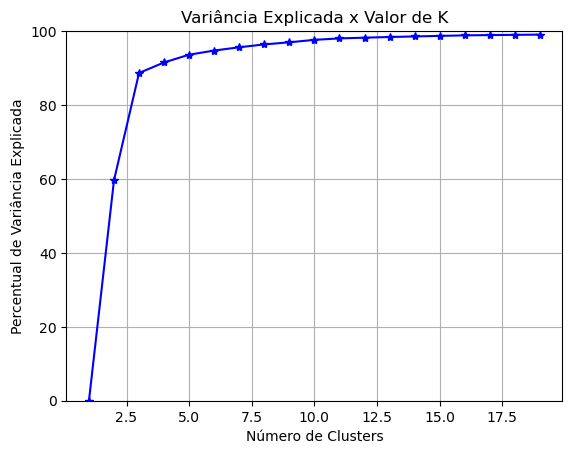

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(valoresk, somaquadradosentre/somatotal * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

Criando um modelo com k = 3

In [56]:
modelo_v1 = KMeans(n_clusters = 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

Coeficiente silhueta para k = 3

In [59]:
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.8511199418424696

Criando um modelo para k = 8

In [62]:
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()

Nomes das colunas

In [65]:
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Criando um cluster map

In [67]:
clustermap = pd.DataFrame(parte1, columns = names)
clustermap['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
clustermap['cluster'] = modelo_v1.labels_
clustermap

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,3.568,0.000,241.73,14.8,0.0,8.0,18.0,1
1,1.590,0.100,240.93,6.6,0.0,0.0,18.0,1
2,0.224,0.000,242.12,1.0,0.0,0.0,0.0,0
3,1.488,0.176,242.30,6.2,0.0,1.0,18.0,1
4,1.194,0.000,236.74,5.0,0.0,0.0,17.0,1
...,...,...,...,...,...,...,...,...
20487,1.580,0.192,243.90,6.4,2.0,1.0,19.0,1
20488,1.314,0.050,242.97,5.4,0.0,0.0,18.0,1
20489,2.914,0.214,236.31,12.2,0.0,2.0,17.0,1
20490,0.360,0.088,245.58,1.6,0.0,1.0,0.0,0


Média de consumo de energia por cluster

In [68]:
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.514158
1    1.775564
2    4.461617
3    6.705700
4    3.365962
5    3.699743
6    2.585134
7    2.343017
Name: Global_active_power, dtype: float64

Quantidade de observacoes por cluster

In [69]:
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0    12987
1     6122
2      339
3       60
4      208
5      350
6      247
7      179
Name: Global_active_power, dtype: int64